In [15]:
content <- read.csv("listings.csv")
str(content)

'data.frame':	39453 obs. of  75 variables:
 $ id                                          : num  5.27e+07 9.04e+17 7.85e+17 5.41e+07 8.37e+17 ...
 $ listing_url                                 : chr  "https://www.airbnb.com/rooms/52702018" "https://www.airbnb.com/rooms/903776106853996545" "https://www.airbnb.com/rooms/784969376930125242" "https://www.airbnb.com/rooms/54089885" ...
 $ scrape_id                                   : num  2.02e+13 2.02e+13 2.02e+13 2.02e+13 2.02e+13 ...
 $ last_scraped                                : chr  "2023-09-05" "2023-09-05" "2023-09-05" "2023-09-05" ...
 $ source                                      : chr  "city scrape" "city scrape" "city scrape" "city scrape" ...
 $ name                                        : chr  "Rental unit in Queens · ★4.90 · 1 bedroom · 2 beds · 1 bath" "Rental unit in Queens · ★New · 3 bedrooms · 4 beds · 1 bath" "Home in Queens · ★4.97 · 3 bedrooms · 4 beds · 1 bath" "Rental unit in Bronx · ★4.75 · 2 bedrooms · 3 beds · 1

In [16]:
library(ggplot2)
library(ggvis)
library(skimr)

In [17]:
# Assuming 'your_data' is your data frame
character_data <- content[, sapply(content, function(x) any(is.character(x)))]
str(character_data)


'data.frame':	39453 obs. of  35 variables:
 $ listing_url                 : chr  "https://www.airbnb.com/rooms/52702018" "https://www.airbnb.com/rooms/903776106853996545" "https://www.airbnb.com/rooms/784969376930125242" "https://www.airbnb.com/rooms/54089885" ...
 $ last_scraped                : chr  "2023-09-05" "2023-09-05" "2023-09-05" "2023-09-05" ...
 $ source                      : chr  "city scrape" "city scrape" "city scrape" "city scrape" ...
 $ name                        : chr  "Rental unit in Queens · ★4.90 · 1 bedroom · 2 beds · 1 bath" "Rental unit in Queens · ★New · 3 bedrooms · 4 beds · 1 bath" "Home in Queens · ★4.97 · 3 bedrooms · 4 beds · 1 bath" "Rental unit in Bronx · ★4.75 · 2 bedrooms · 3 beds · 1 bath" ...
 $ description                 : chr  "Unique entire unit 1-bedroom Apartment in a private house. Conveniently located 3 minutes away from La Guardia "| __truncated__ "Unique entire duplex 3 bedroom Apartment in a private house plus a nice area to spend time 

In [18]:
property_data <- character_data[, "property_type", drop = FALSE]
print(property_data)

                           property_type
1                     Entire rental unit
2                     Entire rental unit
3                            Entire home
4                     Entire rental unit
5                     Entire rental unit
6                     Entire rental unit
7                            Entire home
8                     Entire rental unit
9                     Entire rental unit
10                    Entire rental unit
11                           Entire home
12                      Entire townhouse
13                  Entire vacation home
14                      Entire townhouse
15                      Entire townhouse
16                    Entire rental unit
17                  Entire vacation home
18                  Private room in home
19                  Private room in home
20                  Private room in home
21                           Entire home
22           Private room in rental unit
23           Private room in rental unit
24              

In [19]:
price_data <- character_data[, "price", drop = FALSE]
print(price_data)

           price
1        $171.00
2        $137.00
3        $311.00
4        $116.00
5        $255.00
6        $141.00
7         $99.00
8        $108.00
9        $118.00
10       $160.00
11       $600.00
12       $328.00
13       $139.00
14       $518.00
15       $485.00
16       $242.00
17       $245.00
18        $43.00
19        $49.00
20        $45.00
21       $110.00
22        $88.00
23        $89.00
24       $164.00
25       $141.00
26        $79.00
27    $10,000.00
28        $82.00
29       $103.00
30        $45.00
31        $46.00
32        $45.00
33        $45.00
34        $46.00
35        $45.00
36        $49.00
37       $129.00
38       $110.00
39        $84.00
40        $68.00
41        $48.00
42        $48.00
43       $163.00
44       $166.00
45       $163.00
46       $164.00
47       $125.00
48       $140.00
49       $230.00
50        $99.00
51        $89.00
52        $89.00
53        $89.00
54        $85.00
55        $55.00
56        $68.00
57        $72.00
58       $110.

In [20]:
neighbourhood_data <- character_data[, "neighbourhood_group_cleansed", drop = FALSE] #nolint
print(neighbourhood_data)

      neighbourhood_group_cleansed
1                           Queens
2                           Queens
3                           Queens
4                            Bronx
5                            Bronx
6                            Bronx
7                            Bronx
8                            Bronx
9                            Bronx
10                           Bronx
11                          Queens
12                          Queens
13                          Queens
14                          Queens
15                          Queens
16                          Queens
17                          Queens
18                        Brooklyn
19                        Brooklyn
20                        Brooklyn
21                        Brooklyn
22                           Bronx
23                           Bronx
24                           Bronx
25                           Bronx
26                           Bronx
27                           Bronx
28                  

In [21]:
integer_data <- content[, sapply(content, function(x) any(is.integer(x)))]
str(integer_data)

'data.frame':	39453 obs. of  23 variables:
 $ host_id                                     : int  93231383 93231383 93231383 398622781 398622781 398622781 398622781 398622781 398622781 398622781 ...
 $ host_listings_count                         : int  3 3 3 9 9 9 9 9 9 9 ...
 $ host_total_listings_count                   : int  3 3 3 9 9 9 9 9 9 9 ...
 $ accommodates                                : int  4 6 7 5 10 5 2 4 5 5 ...
 $ bedrooms                                    : int  1 3 3 2 4 2 8 1 2 2 ...
 $ beds                                        : int  2 4 4 3 6 3 1 3 3 3 ...
 $ minimum_nights                              : int  1 30 30 30 1 1 1 30 1 1 ...
 $ maximum_nights                              : int  1125 365 365 1125 365 365 356 365 365 365 ...
 $ minimum_minimum_nights                      : int  30 30 30 30 30 30 30 30 30 30 ...
 $ maximum_minimum_nights                      : int  30 30 30 30 30 30 30 30 30 30 ...
 $ minimum_maximum_nights                      : int 

In [22]:
latitude_data <- content[, "latitude", drop = FALSE]
print(latitude_data)

      latitude
1     40.76911
2     40.76951
3     40.76818
4     40.83995
5     40.83924
6     40.84087
7     40.84070
8     40.83957
9     40.83950
10    40.84141
11    40.70295
12    40.71734
13    40.71726
14    40.70405
15    40.70465
16    40.70317
17    40.70453
18    40.65409
19    40.65229
20    40.65248
21    40.67160
22    40.81908
23    40.81674
24    40.81637
25    40.81690
26    40.81543
27    40.81521
28    40.81612
29    40.85935
30    40.85817
31    40.85935
32    40.85880
33    40.85903
34    40.85935
35    40.89588
36    40.89600
37    40.67227
38    40.68204
39    40.68204
40    40.66289
41    40.63904
42    40.63955
43    40.68713
44    40.68711
45    40.68585
46    40.68556
47    40.61762
48    40.61787
49    40.57865
50    40.83357
51    40.69526
52    40.69351
53    40.61281
54    40.65610
55    40.63224
56    40.63417
57    40.63419
58    40.63387
59    40.63298
60    40.63246
61    40.68733
62    40.68754
63    40.68547
64    40.67379
65    40.68937
66    40.6

In [23]:
longitude_data <- content[, "longitude", drop = FALSE]
print(longitude_data)

      longitude
1     -73.87053
2     -73.86976
3     -73.87126
4     -73.83317
5     -73.83119
6     -73.83319
7     -73.83328
8     -73.83236
9     -73.83315
10    -73.83300
11    -73.89822
12    -73.87805
13    -73.87628
14    -73.89761
15    -73.89909
16    -73.89949
17    -73.89898
18    -73.94569
19    -73.94556
20    -73.94584
21    -73.88797
22    -73.86432
23    -73.86517
24    -73.86336
25    -73.86516
26    -73.86360
27    -73.86527
28    -73.86434
29    -73.86498
30    -73.86409
31    -73.86498
32    -73.86410
33    -73.86401
34    -73.86498
35    -73.84045
36    -73.84153
37    -73.84795
38    -73.79682
39    -73.79681
40    -73.95756
41    -73.98103
42    -73.98251
43    -73.87454
44    -73.87407
45    -73.87250
46    -73.87445
47    -73.99852
48    -73.99968
49    -73.96422
50    -73.85827
51    -73.95028
52    -73.95129
53    -73.98807
54    -73.90589
55    -74.02755
56    -74.02950
57    -74.02778
58    -74.02967
59    -74.02950
60    -74.02771
61    -73.87528
62    -7

In [30]:
price <- as.numeric(gsub("\\$", "", price_data$price))
print(price)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


    [1] 171 137 311 116 255 141  99 108 118 160 600 328 139 518 485 242 245  43
   [19]  49  45 110  88  89 164 141  79  NA  82 103  45  46  45  45  46  45  49
   [37] 129 110  84  68  48  48 163 166 163 164 125 140 230  99  89  89  89  85
   [55]  55  68  72 110  72  75  60  60  64  93  74  41 195 321  87 152 243 111
   [73] 115 102 125 118 111 100 215  88  60  52 162 144 145 168 157 130  69 181
   [91]  79 300 129 190 266  99 115  75 101  65 180 554 103  89  99  99 103 103
  [109]  85 100 325  85  85 100  80 325  98 400  56  67 162  59  59 100 258  45
  [127]  35  35  45  97 399  60 182 120 180  65  75 198  46  41  42  49  50  41
  [145]  42  42  47  45  60  51  70 175  76  45 120 120 120 107 120 120 120 100
  [163] 100  55  85  95  55 190 107  74 118 115 102  75 111 150 215 249  69  59
  [181]  47  95 900 350 219 900 229 130 179 299 249 108 113  NA  50  65 140 140
  [199]  49 240 113  50  64  26 175  41 350  41  45 119 175  NA 150 175 700 600
  [217] 464 214 100  48  46  58  65 160 

In [31]:
data <- cbind(integer_data, cbind(price,cbind(property_data,neighbourhood_data))) #nolint
data

host_id   host_listings_count host_total_listings_count accommodates
1      93231383  3                   3                         4          
2      93231383  3                   3                         6          
3      93231383  3                   3                         7          
4     398622781  9                   9                         5          
5     398622781  9                   9                        10          
6     398622781  9                   9                         5          
7     398622781  9                   9                         2          
8     398622781  9                   9                         4          
9     398622781  9                   9                         5          
10    398622781  9                   9                         5          
11     50997424 10                  10                        16          
12     50997424 10                  10                        12          
13     50997424 10                  10                         4          
14     50997424 10                  10                        14          
15     50997424 10                  10                        16          
16     50997424 10                  10                         6          
17     50997424 10                  10                         6          
18    297311545  3                   4                         1          
19    297311545  3                   4                         1          
20    297311545  3                   4                         1          
21    234174616  1                   1                         2          
22    193626078  7                  10                         2          
23    193626078  7                  10                         2          
24    193626078  7                  10                         3          
25    193626078  7                  10                         3          
26    193626078  7                  10                         3          
27    193626078  7                  10                         3          
28    193626078  7                  10                         2          
29    156583372  8                   8                         4          
30    156583372  8                   8                         1          
⋮     ⋮         ⋮                   ⋮                         ⋮           
39424    210602 1                   3                         4           
39425  41870118 1                   1                         6           
39426 131544841 1                   1                         2           
39427 107952354 1                   1                         2           
39428 346906516 2                   2                         2           
39429  20942935 1                   1                         2           
39430  93094135 1                   2                         2           
39431  25015010 1                   2                         2           
39432  11581619 1                   1                         2           
39433  29497388 1                   1                         2           
39434   1700359 1                   2                         3           
39435  82921914 4                   5                         2           
39436  82921914 4                   5                         2           
39437 255178006 1                   1                         2           
39438 107548612 1                   1                         3           
39439  25002053 1                   1                         1           
39440  67103923 1                   1                         1           
39441  30704814 1                   3                         4           
39442 277939812 1                   1                         2           
39443 409022952 1                   2                         3           
39444  14923355 1                   1                         3           
39445  83476674 1              

In [32]:
data <- data[complete.cases(data$price), , drop = FALSE]
print(colnames(data))

 [1] "host_id"                                     
 [2] "host_listings_count"                         
 [3] "host_total_listings_count"                   
 [4] "accommodates"                                
 [5] "bedrooms"                                    
 [6] "beds"                                        
 [7] "minimum_nights"                              
 [8] "maximum_nights"                              
 [9] "minimum_minimum_nights"                      
[10] "maximum_minimum_nights"                      
[11] "minimum_maximum_nights"                      
[12] "maximum_maximum_nights"                      
[13] "availability_30"                             
[14] "availability_60"                             
[15] "availability_90"                             
[16] "availability_365"                            
[17] "number_of_reviews"                           
[18] "number_of_reviews_ltm"                       
[19] "number_of_reviews_l30d"                      
[20] "calcul

In [33]:
summary(data)

    host_id          host_listings_count host_total_listings_count
 Min.   :     2234   Min.   :   0.0      Min.   :   1.0           
 1st Qu.: 16437254   1st Qu.:   1.0      1st Qu.:   1.0           
 Median : 76492666   Median :   2.0      Median :   3.0           
 Mean   :154841852   Mean   : 131.1      Mean   : 206.6           
 3rd Qu.:273301089   3rd Qu.:   6.0      3rd Qu.:   9.0           
 Max.   :535531720   Max.   :4577.0      Max.   :9176.0           
                     NA's   :5           NA's   :5                
  accommodates       bedrooms           beds        minimum_nights  
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   :   1.0  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:  30.0  
 Median : 2.000   Median : 1.000   Median : 1.000   Median :  30.0  
 Mean   : 2.845   Mean   : 1.566   Mean   : 1.623   Mean   :  28.1  
 3rd Qu.: 4.000   3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.:  30.0  
 Max.   :16.000   Max.   :50.000   Max.   :21.000 

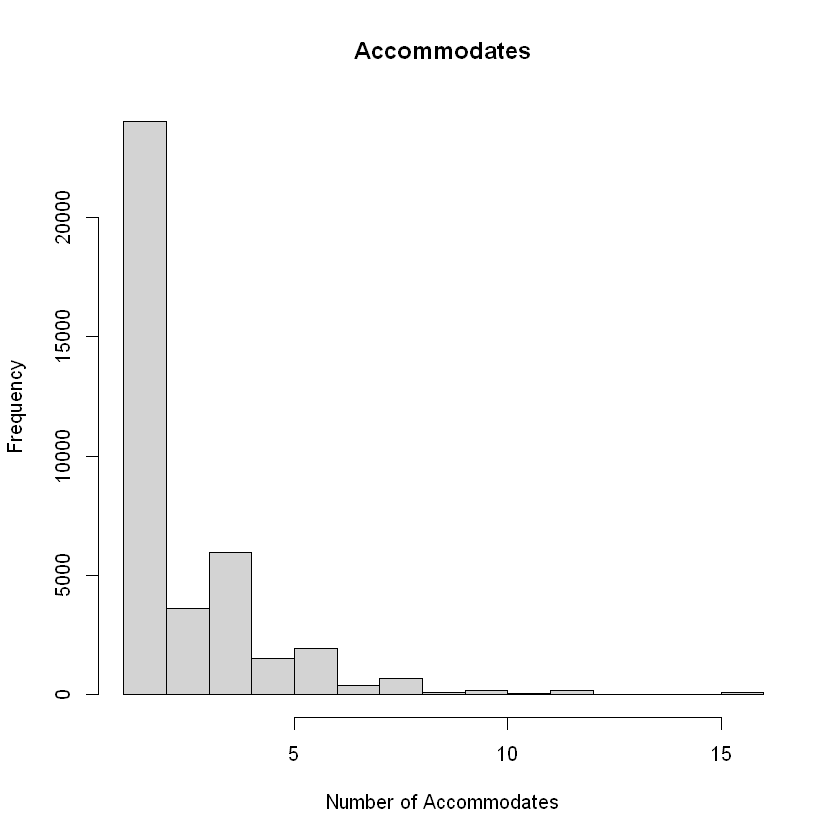

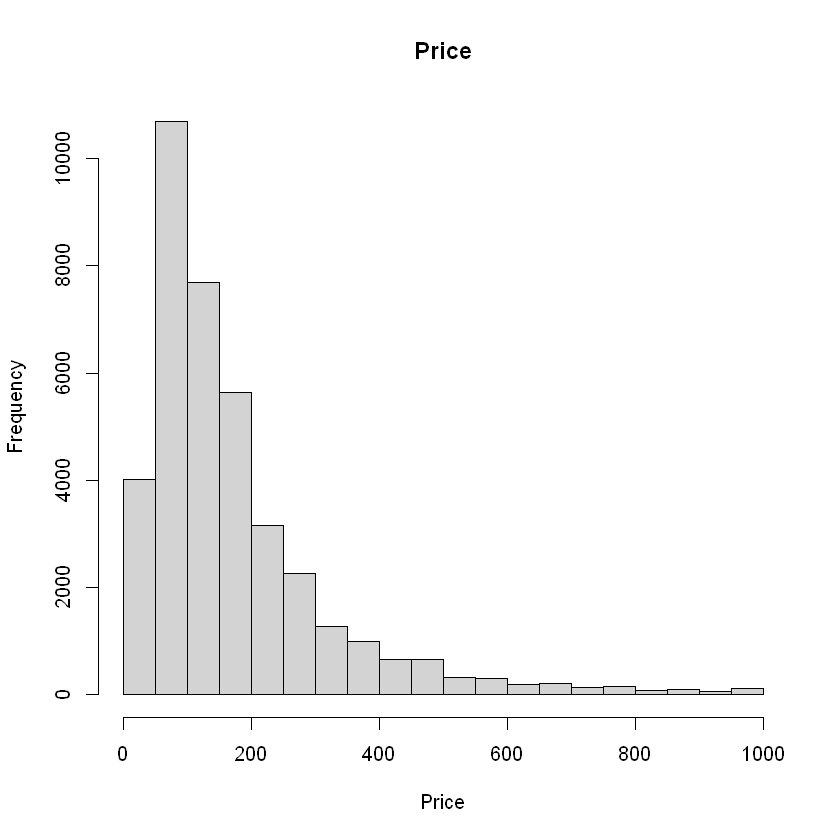

In [34]:

par(mfrow = c(1, 1))

hist(data$accommodates, main = "Accommodates", xlab = "Number of Accommodates")
hist(data$price, main = "Price", xlab = "Price")

par(mfrow = c(1, 1))


In [35]:
host_counts <- table(data$host_id)

# Get the top 10 hosts
top_host <- head(sort(host_counts, decreasing = TRUE), 10)

# Display the top 10 hosts
print(top_host)



107434423   3223938 305240193 496944100  19303369 200239515 204704622 162280872 
      593       519       445       274       251       235       221       205 
501999278  51501835 
      164       135 


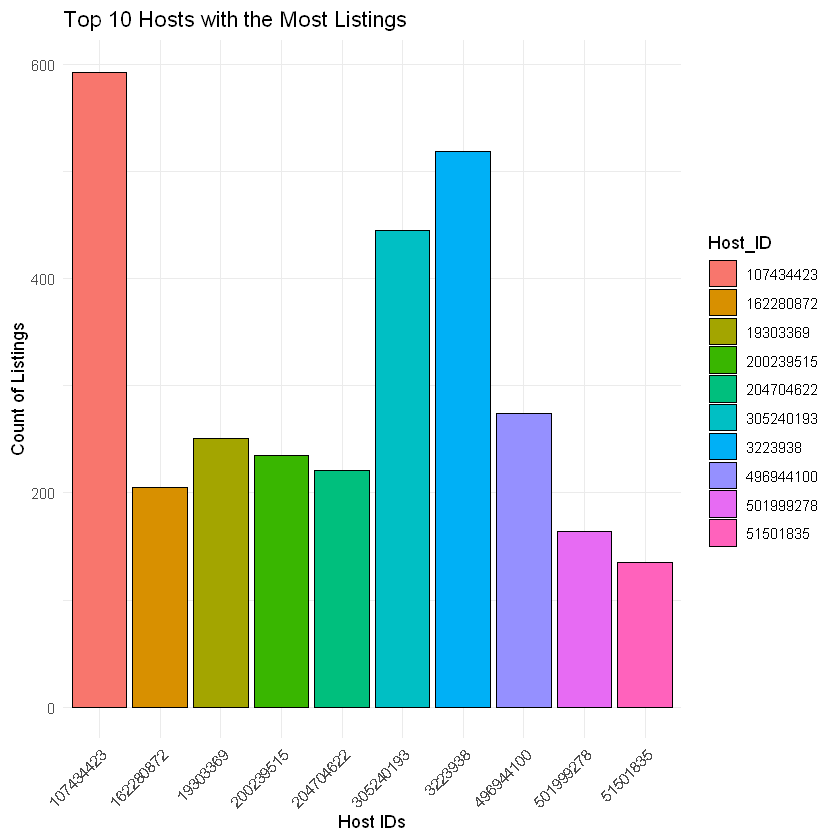

In [36]:

top_host_df <- data.frame(Host_ID = names(top_host), P_Count = as.numeric(top_host)) #nolint
bar_chart <- ggplot(top_host_df, aes(x = Host_ID, y = P_Count, fill = Host_ID))+
  geom_bar(stat = "identity", color = "black") +
  theme_minimal() +
  labs(title = "Top 10 Hosts with the Most Listings",
       y = "Count of Listings",
       x = "Host IDs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(bar_chart)

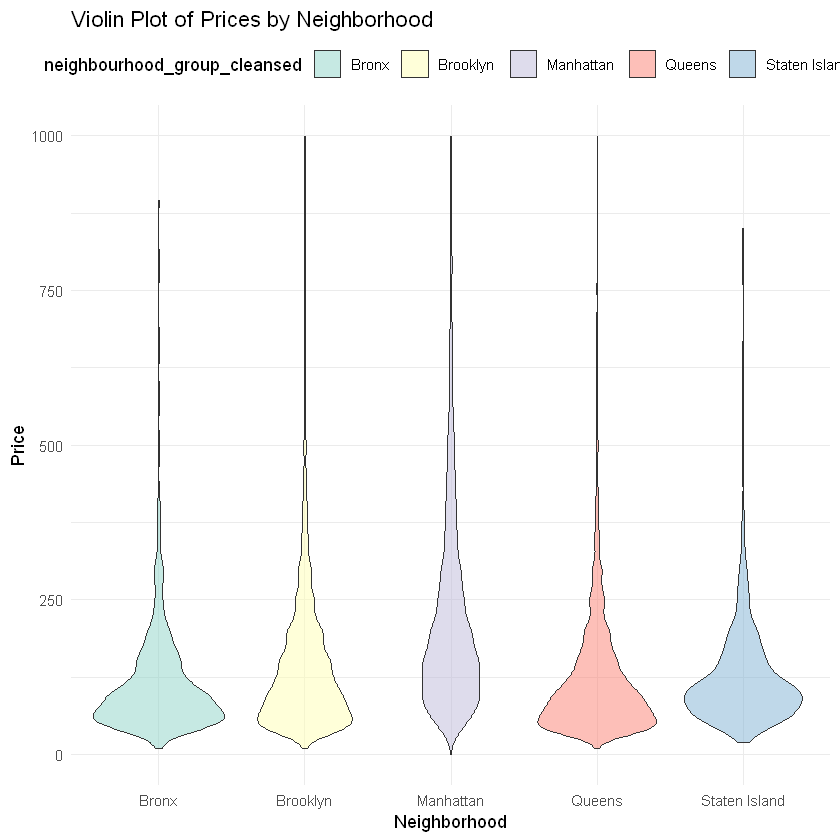

In [40]:
violin_plot <- ggplot(data, aes(x = neighbourhood_group_cleansed, y = price, fill = neighbourhood_group_cleansed)) + #nolint
  geom_violin(alpha = 0.5) +
  labs(title = "Violin Plot of Prices by Neighborhood",
       y = "Price",
       x = "Neighborhood") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_fill_brewer(palette = "Set3") 

print(violin_plot)

In [38]:
average_price <- mean(data$price, na.rm = TRUE)

print(average_price)


[1] 177.6319
